In [27]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
import tensorflow as tf

import matplotlib.pyplot as plt
import os

In [28]:
#print("Version: ", tf.__version__)

In [29]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
#print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
GPU is NOT AVAILABLE


In [30]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding='ISO-8859-1', 
                 names=[
                        'target',
                        'id',
                        'date',
                        'flag',
                        'user',
                        'text'
                        ])

In [31]:
df.head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [32]:
print(df.text[0])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [33]:
df.target.unique()

array([0, 4], dtype=int64)

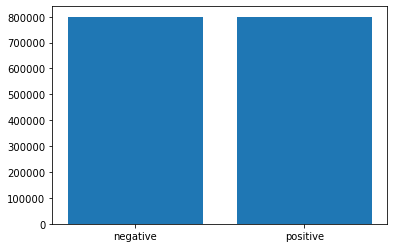

In [34]:
classes = df.target.unique()
counts = []

for i in classes:
  count = len(df[df.target==i])
  counts.append(count)

plt.bar(['negative', 'positive'], counts)
plt.show()

#import re


#def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    #text = re.sub(r'<.*?>', '', text)
    
    #remove URL
    #results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    #text=re.sub(results, '', text)
    
    # remove the characters [\], ['] and ["]
    #text = re.sub(r"\\", "", text)    
    #text = re.sub(r"\'", "", text)    
    #text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    #text = text.strip().lower()
    
    # replace punctuation characters with spaces
    #filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    #translate_dict = dict((c, " ") for c in filters)
    #translate_map = str.maketrans(translate_dict)
    #text = text.translate(translate_map)

    #return text

In [35]:
#print (clean_text(df.text[0]))

In [36]:
#for i in range (df.shape[0]):
    #df.replace(df.text[i],clean_text(df.text[i]))

In [37]:
x = df.text.values
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [38]:
print(x_train[174])

http://bit.ly/udAmt  watch this and tell me that you didn't cry like a small child! 


In [39]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [40]:
print(x_train[174], '\n', X_train[174])

http://bit.ly/udAmt  watch this and tell me that you didn't cry like a small child!  
   (0, 581473)	0.11497678067605911
  (0, 558473)	0.22551621836278812
  (0, 542610)	0.5740696940108136
  (0, 523051)	0.15421655254692973
  (0, 516665)	0.13328884107719244
  (0, 514050)	0.24215589706575338
  (0, 482386)	0.30208360306899495
  (0, 345471)	0.13307763332030126
  (0, 329928)	0.23046364924504428
  (0, 317050)	0.16199082950922825
  (0, 242952)	0.16482293386754257
  (0, 159633)	0.21463154250348962
  (0, 140954)	0.2756584265945658
  (0, 121945)	0.33622967404752313
  (0, 89292)	0.20817035927716887
  (0, 57443)	0.11069680098379132


In [41]:
import re

# delimiters https://stackoverflow.com/questions/35221535/python-removing-delimiters-from-strings
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

# clean up the string
for i in range (len(x_train)):
    s = x_train[i]
    s = ' '.join(w for w in re.split("["+"\\".join(d)+"]", s) if w)

for i in s.split():
    if len(i)>1: print(i, vectorizer.vocabulary_[i.lower()])

hanging 228710
with 566694
friend 205522
and 57443
doin 165596
hw 244685
guy 225597
went 561321
to 528395
brunch 102375


In [42]:
classifier = LinearSVC(max_iter=2000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796734375


In [43]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=df.target.unique())
df_cm = pd.DataFrame(cm, index=df.target.unique(), columns=df.target.unique())
df_cm

,0,4
0,127023,33298
4,31747,127932


In [44]:
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
    df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,0,4
0,0.800044,0.206525
4,0.199956,0.793475


In [45]:
tweet = 'PATRIOTIC AMERICANS STAND PROUDLY WITH PRESIDENT TRUMP!!'
vectTweet = vectorizer.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
print('Tweet is', 'positive' if prediction[0]==4 else 'negative')

Tweet is positive


In [46]:
tweetList = ['Best tweet ever!', 'Mondays are the worst...']
vectTweet = vectorizer.transform(np.array(tweetList))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
for enum, i in enumerate(tweetList):
    print(i, '| This tweet is', 'positive' if prediction[enum]==4 else 'negative')

Best tweet ever! | This tweet is positive
Mondays are the worst... | This tweet is negative
